In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
from urllib import request
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import urllib
import cv2
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import ssl

In [ ]:
# ,'XM3','QM6','SM6','르노 MASTER'

In [94]:
car_model = ['XM3 E-TECH 하이브리드','XM3','QM6','SM6','르노 MASTER']

In [95]:
def selenium_scroll(driver):  # 구글 검색 후 스크롤 내리는 함수
    SCROLL_PAUSE_SEC = 3
    i = 0
    while i<10:  # 스크롤 내린 후 더보기 버튼이 있다면 클릭
        i += 1    # 없으면 다시 스크롤 내리기 (10번 반복)
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(SCROLL_PAUSE_SEC)
        try:
            btn =  driver.find_element(By.CSS_SELECTOR,'#islmp > div > div > div > div.gBPM8 > div.qvfT1 > div.YstHxe > input')
            btn.click()
        except:
            pass

In [100]:
def url_to_image(url, readFlag=cv2.IMREAD_COLOR):  # 이미지 url을 np.array로 바꿔주는 함수
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    gcontext = ssl.SSLContext()
    webpage = urlopen(req,context=gcontext,timeout=10)  # 정상적으로 열리지 않는 url이 있어서 timeout 옵션 부여
    image = np.asarray(bytearray(webpage.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)

    return image

In [101]:
car ={}

# type(car_model)

In [102]:
def crawling(carname):  # 크롤링하여 dictionary 형태로 저장하는 함수
    car[carname] = []
    while(True):
        try:
            driver = webdriver.Chrome('C:/Users/Gunhee/Downloads/chromedriver_win32/chromedriver.exe')  # 1. 구글 이미지 접속
            url = 'https://www.google.com/imghp'
            driver.get(url)
            break
        except:
            pass      
    browser = driver.find_element(By.NAME,"q")  # 2. carname을 매개변수로 받아서 검색
    browser.send_keys(carname)
    browser.send_keys('\n')
    driver.implicitly_wait(2)
    selenium_scroll(driver)  # 3. 스크롤 끝까지 내리기  
    time.sleep(1)
    html = driver.page_source  # 4. 스크롤 끝까지 내린 상태에서 페이지 소스 변수로 저장
    soup = BeautifulSoup(html, 'html.parser')
    imgs = driver.find_elements(By.CSS_SELECTOR, '#islrg > div.islrc > div a.wXeWr.islib.nfEiy')
    for i in range(len(imgs)):
        if i >= 300:  # 최대 300장의 이미지 저장
            break   
        try:
            imgs[i].click()  # 5. 이미지 클릭
            time.sleep(1)
        except:
            break
        count = 0
        while(True):
            if count > 10:
                break
            count += 1
            try:
                # 6. 클릭한 이미지에서 url 정보 가져오기0
#                 image = driver.find_element(By.CSS_SELECTOR,".rg_i.Q4LuWd")
                image = driver.find_element(By.CSS_SELECTOR, '#Sva75c > div > div > div.pxAole > div.tvh9oe.BIB1wf > c-wiz > div > div.OUZ5W > div.zjoqD > div.qdnLaf.isv-id > div > a')
                print(f"Image saved: {carname}_{count}")
                time.sleep(0.5)
                break
            except:
                pass
        count2 = 0
        while(True):
            if count2 > 5:
                break
            count2 += 1
            try:
                # 7. 가져온 url을 통해 이미지를 np.array로 저장 후 dictionary 안의 리스트에 저장
                image = image.find_element(By.TAG_NAME, 'img').get_attribute('src')
                image = url_to_image(image)
                car[carname].append(image)
                print(f"Image saved: {carname}_{count2}")
                break
            except:
                pass

    driver.close()

In [112]:
crawling(car_model[4])

C:\Users\Gunhee\AppData\Local\Temp\ipykernel_16360\1885946038.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/Users/Gunhee/Downloads/chromedriver_win32/chromedriver.exe')  # 1. 구글 이미지 접속


Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1
Image saved: 르노 MASTER_1


In [113]:
car.keys()

dict_keys(['XM3 E-TECH 하이브리드', 'XM3', 'QM6', 'SM6', '르노 MASTER'])

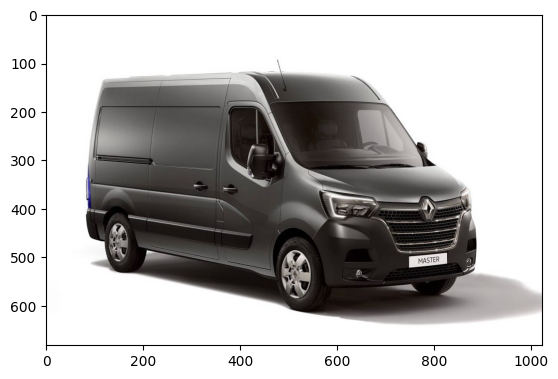

In [114]:
plt.imshow(car['르노 MASTER'][2])

In [115]:
np.save('C:/Users/Gunhee/test/letsgo/npy', car) 

In [4]:
car1 = np.load(('C:/Users/Gunhee/test/letsgo/npy.npy'),allow_pickle='TRUE').item()

In [5]:
car1.keys()

dict_keys(['XM3 E-TECH 하이브리드', 'XM3', 'QM6', 'SM6', '르노 MASTER'])

In [4]:
len(npy['르노 MASTER'])

46

In [2]:
npy = np.load(('C:/Users/Gunhee/test/letsgo/npy2.npy'),allow_pickle='TRUE').item()


In [7]:
def classify_car(img,carList):  # np.array 형태의 이미지를 받아서 차량으로 분류되면 리스트에 저장하는 함수
    w = 'C:/Users/Gunhee/test/letsgo/yolov3/yolov3.weights'  # 본인 컴퓨터 경로로 설정
    c = 'C:/Users/Gunhee/test/letsgo/yolov3/yolov3.cfg'
    try:
        yolo_model = cv2.dnn.readNet(w,c)  # 기존에 학습된 yolo 모델 불러오기
        blob = cv2.dnn.blobFromImage(img,1.0/255,(128,128),(0,0,0),swapRB=True,crop=False)  # 이미지를 blob형식으로 변경
        yolo_model.setInput(blob)  # blob형식으로 변경한 이미지를 input으로 yolo 모델에 넣어준다

        # yolo 모델에 사용된 layer 중 yolo에 해당하는 layer만 가져오기
        layer_names = yolo_model.getLayerNames()
        out_layers = [layer_names[i-1] for i in yolo_model.getUnconnectedOutLayers()]   
        outputs = yolo_model.forward(out_layers)

        class_ids, confidences, boxes = [],[],[]
        height, width, channels = img.shape

        # 확률이 0.5를 넘는 바운딩 박스를 생성하고 모음
        for output in outputs:
            for vec85 in output:
                scores = vec85[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                if confidence > 0.5:  # 신뢰도가 50% 초과인 경우만 취급
                    centerx,centery = int(vec85[0]*width), int(vec85[1]*height)
              # 영상 크기로 변환
                    w,h = int(vec85[2]*width), int(vec85[3]*height)
                    x,y = int(centerx - w / 2), int(centery - h / 2)
                    boxes.append([x,y,w,h])
                    confidences.append(float(confidence))
                    class_ids.append(class_id)

        indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)  # 분류된 것 중에 최대인 것만 남김

        classes = []
        with open('C:/Users/Gunhee/test/letsgo/yolov3/coco.names.txt', 'r') as f:
              classes = [line.strip() for line in f.readlines()]

        for i in indexes:
            if classes[class_ids[i]] == 'car':  # 분류명이 car일 때 리스트에 저장
                x,y,w,h = boxes[i]
                if all([w >= width * 0.5, h >= height * 0.5]):
                    img = cv2.resize(img, (256,256))
                    carList.append(img)
                    break
    except:
        return

In [5]:
XM3 = []
XM3_E_TECH =[]
QM6= []
SM6= []
MASTER =[]

In [27]:
for i in range(len(npy['QM6'])):
    classify_car(npy['QM6'][i],QM6)

In [158]:
np.save('C:/Users/Gunhee/test/letsgo/xm3_e', XM3_E_TECH)

In [9]:
npy.keys()

dict_keys(['XM3 E-TECH 하이브리드', 'XM3', 'QM6', 'SM6', '르노 MASTER'])

0

In [16]:
# np.save('C:/Users/Gunhee/test/letsgo/XM3', XM3) 

In [19]:
# np.save('C:/Users/Gunhee/test/letsgo/QM6', QM6) 

In [21]:
# np.save('C:/Users/Gunhee/test/letsgo/MASTER', MASTER) 

In [23]:
# np.save('C:/Users/Gunhee/test/letsgo/SM6', SM6) 